In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=12, legendfontsize=10)
safediv(x, y) = x == 0 ? zero(x/y) : x/y
x ⪅ y = x < y || x ≈ y

⪅ (generic function with 1 method)

## 二項分布モデルの尤度函数

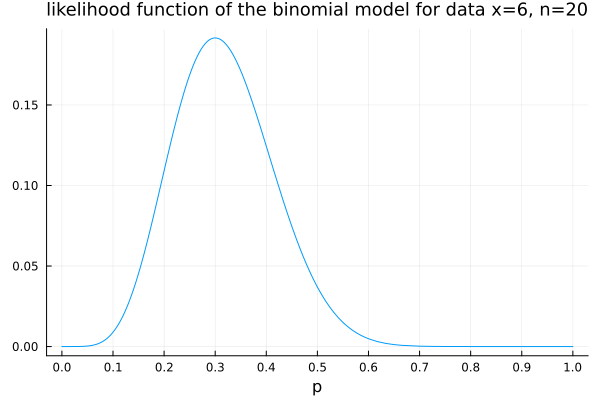

In [2]:
x, n = 6, 20
lik_bin(p) = pdf(Binomial(n, p), x)
plot(lik_bin, 0, 1; label="", xtick=0:0.1:1, xguide="p")
title!("likelihood function of the binomial model for data x=$x, n=$n")

## 二項分布モデルのP値函数達

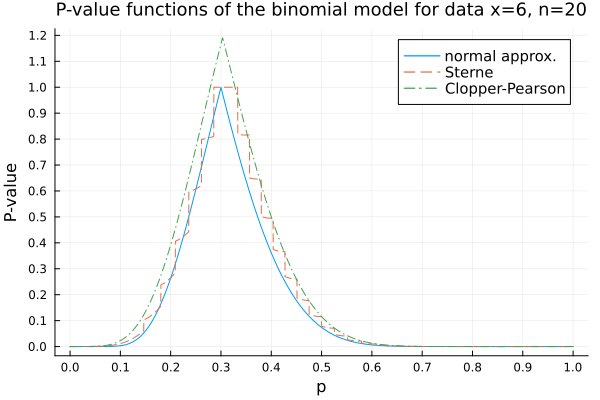

In [3]:
function pvalue_bin_normal_approx(x, n, p)
    z = safediv(x - n*p, √(n*p*(1-p)))
    2ccdf(Normal(), abs(z))
end

function pvalue_bin_sterne(x, n, p)
    P(x) = pdf(Binomial(n, p), x)
    sum(P(k) for k in 0:n if P(k) ⪅ P(x))
end

function pvalue_bin_clopper_pearson(x, n, p)
    bin = Binomial(n, p)
    min(2cdf(bin, x), 2ccdf(bin, x-1))
end

x, n = 6, 20
plot(p -> pvalue_bin_normal_approx(x, n, p), 0, 1; label="normal approx.")
plot!(p -> pvalue_bin_sterne(x, n, p), 0, 1; label="Sterne", ls=:dash)
plot!(p -> pvalue_bin_clopper_pearson(x, n, p), 0, 1; label="Clopper-Pearson", ls=:dashdot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1.5)
plot!(xguide="p", yguide="P-value")
title!("P-value functions of the binomial model for data x=$x, n=$n")

## 正規分布モデルの尤度函数

length(x) = 20
mean(x) = 168.95
std(x) = 8.21727961131458


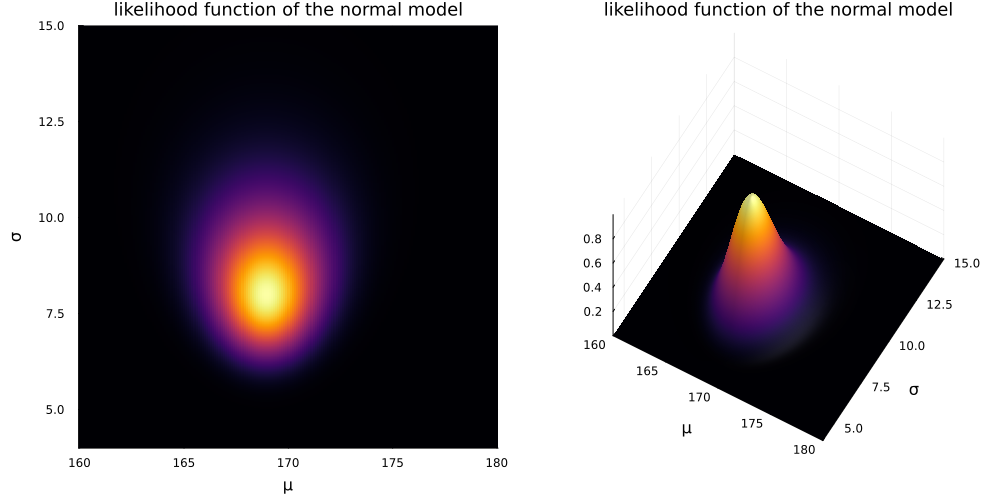

In [4]:
x = [153, 158, 162, 162, 162, 163, 165, 165, 166, 167,
     168, 170, 170, 175, 175, 177, 177, 178, 182, 184]
@show length(x) mean(x) std(x)
normal_mle = fit_mle(Normal, x)
logmaxlik = loglikelihood(normal_mle, x)
lik_normal(μ, σ) = exp(loglikelihood(Normal(μ, σ), x) - logmaxlik)
μ = 160:0.1:180
σ = 4:0.01:15

P = heatmap(μ, σ, lik_normal; colorbar=false)
plot!(xguide="μ", yguide="σ")
title!("likelihood function of the normal model")

Q = surface(μ, σ, lik_normal; colorbar=false, camera=(30, 60))
plot!(xguide="μ", yguide="σ")
title!("likelihood function of the normal model")

plot(P, Q; size=(1000, 500))
plot!(leftmargin=5Plots.mm, bottommargin=4Plots.mm)

## 母平均に関するP値函数

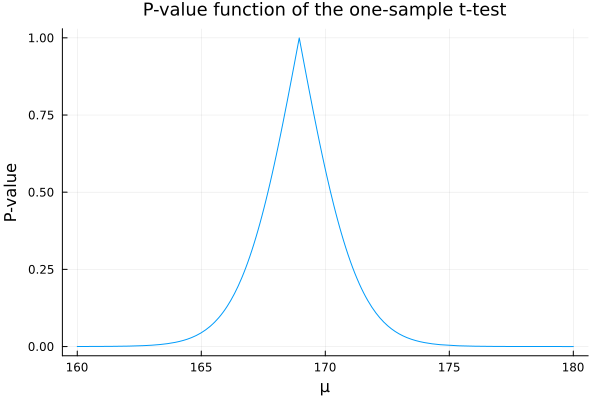

In [5]:
function pvalue_t_test(x, μ)
    n, x̄, s² = length(x), mean(x), var(x)
    t = safediv(x̄ - μ, √(s²/n))
    2ccdf(TDist(n-1), abs(t))
end

plot(μ -> pvalue_t_test(x, μ), extrema(μ)...; label="")
plot!(xguide="μ", yguide="P-value")
title!("P-value function of the one-sample t-test")